### Uncertainty in estimation of intensity-duration-frequency relationship in data-scarce region

#### Introduction

Extreme rainfalls estimation are required for de-signing hydraulic structures such as dams, drainage systems and bridges or  for flood mapping and zoning. In particular, intensity-duration frequency (IDF) curves are used to determine the rainfall  intensity given a return period and the duration of an extreme event. These designs depend on the accuracy of IDF estimation.   However, uncertainties specially due to data and sampling errors. Short data sets lack rep-resentativeness of extreme rainfall  patterns in local analysis.

The incorporation of uncertainties is important, especially when they are estimated for data scarce regions. Point estimates can give a false sense of security. Uncertainties due to climate change [1], model setup [2] have been performed to help decision makers that rely on these estimations. Traditional approaches fit a distribution of maximas such as the Generalized Maximum Value and Gumbel to a series of extreme rainfall for various durations. Then, an IDF equation is fitted to some quantiles of these distributions. However, uncertainty is often overlooked when estimating IDF relationships. Hydrological data is scarce and typical estimation models do not account for uncertainty in parameter estimation.

Bayesian estimates can communicate these uncertainties since model parameters are explicited as a posterior distributions. This paper studies the uncertainties in IDF curves based on a Bayesian inference analysis in Maceió, Brazil.

#### Methodology

##### Study site and data

The city of Maceió, state of Alagoas, is located in Northeast Brazil. Maceió has a tropical umid climate with about 1700mm annual mean precipitation and a wet period between may-august.

The National Meteorological Institute (INMET) has a network of rainfall monitoring stations that record hourly data. The station code A303 (Lat -9.5511º/Long -35.7701º)  located in Macei\'o, was selected for this study. Data cover the period 2003–2019, but has a period of no data between 2006-2008. These three years were discarded from analysis. The hourly rainfalls are then used calculate rainfall intensities for durations of 1h, 2h, 4h, 6h, 12h, 24h, 24h, 72h.

The following code calculates intesities for A303 INMET station.

In [3]:
import pandas as pd
import numpy as np

In [4]:
diretorio=['DADOS/INMET/2003_2014.xlsx', 'DADOS/INMET/2015_2017.xlsx', 'DADOS/INMET/2018_1xlsx.xlsx', 'DADOS/INMET/2018_2_2019.xlsx']
def descompactar(diretorio):
    """
    Função para descompactar arquivos zipados e ler planilhas excel com dados
    Desenvolvedor da função: Clebson

    params:
        diretorio: String com o diretorio do arquivo
    return:
        pd.DataFrame: index:Date; columns:['precipitacao']
    """
    dado_inmet = pd.read_excel(diretorio[0], header=None, index_col=0).drop('data / Variável', axis=0).drop(range(25, 35), axis=1).T
    dado_inmet.index = dado_inmet['HORA UTC']
    dado_inmet = dado_inmet.drop('HORA UTC', axis=1)
    df_inmet = pd.DataFrame()
    for i in dado_inmet:
        date = pd.date_range(start='{}-{}-{}'.format(i.year, i.month, i.day), periods=24, freq='H')
        df_inmet = df_inmet.combine_first(pd.DataFrame(pd.Series(index=date, data = dado_inmet[i].values, name='inmet')))
    df_inmet.loc[df_inmet['inmet'] == '-'] = np.NaN
    
    
    dado_inmet2 = pd.read_excel(diretorio[1], header=None, index_col=0).drop(range(1, 52), axis=1).drop(range(76, 86), axis=1).drop('data', axis=0).T
    dado_inmet2.index = dado_inmet2['HORA UTC']
    dado_inmet2 = dado_inmet2.drop('HORA UTC', axis=1)
    for i in dado_inmet2:
        date = pd.date_range(start='{}-{}-{}'.format(i.year, i.month, i.day), periods=24, freq='H')
        df = pd.DataFrame(pd.Series(index=date, data=list(dado_inmet2[i].values), name='inmet')).copy()
        df_inmet = df_inmet.combine_first(df)
    
    
    dado_inmet3 = pd.read_excel(diretorio[2], header=None, index_col=0).drop(range(25, 35), axis=1).drop(np.NaN, axis=0).T
    dado_inmet3.index = dado_inmet3['DATA ']
    dado_inmet3 = dado_inmet3.drop('DATA ', axis=1)
    for i in dado_inmet3:
        date = pd.date_range(start='{}-{}-{}'.format(i.year, i.month, i.day), periods=24, freq='H')
        df_inmet = df_inmet.combine_first(pd.DataFrame(pd.Series(index=date, data = dado_inmet3[i].values, name='inmet')))
    
    
    dado_inmet4 = pd.read_excel(diretorio[3], header=None).drop(0, axis=0)
    dates = []
    data = []
    for i in dado_inmet4.index:
        try:
            data.append(float(dado_inmet4[2][i].replace(',', '.')))
        except:
            data.append(dado_inmet4[2][i])

        dates.append(pd.to_datetime('{} {}:00:00'.format(dado_inmet4[0][i], dado_inmet4[1][i]/100)))
    date = pd.DatetimeIndex(dates)

    dados = df_inmet.combine_first(pd.DataFrame(pd.Series(data=data, index=date, name='inmet')))
    return dados

dados = descompactar(diretorio)
dados

,inmet
2003-02-25 00:00:00,NaN
2003-02-25 01:00:00,NaN
2003-02-25 02:00:00,NaN
2003-02-25 03:00:00,NaN
2003-02-25 04:00:00,NaN
...,...
2019-12-31 19:00:00,0
2019-12-31 20:00:00,0
2019-12-31 21:00:00,0
2019-12-31 22:00:00,0


In [7]:
no_data_count = dados.isnull().groupby(pd.Grouper(freq='A')).sum()
no_data_count 

,inmet
2003-12-31,15.0
2004-12-31,38.0
2005-12-31,297.0
2006-12-31,3427.0
2007-12-31,8760.0
2008-12-31,6254.0
2009-12-31,22.0
2010-12-31,10.0
2011-12-31,9.0
2012-12-31,447.0


In [8]:
# Delete period years no data
date_start = pd.to_datetime("01/01/2006 00:00:00", dayfirst=True)
date_end = pd.to_datetime("31/12/2008 23:00:00", dayfirst=True)
date = pd.date_range(start=date_start, end=date_end, freq='H')

dados_sem_falhas = dados.drop(date, axis=0)

In [17]:
duracoes = [1, 2, 6, 12, 24, 48, 72]
def calcula_intensidade(dados, duracoes):
    """
    Função para calcular a intensidade para as respectivas durações
    Desenvolvedor da função: Clebson

    params:
        dados: index:Date; columns:['precipitacao']
        duracoes: lista com durações
    return:
        intensidades: index:Date; columns:['intensidade', 'duracao']
    """
    list_df_year = list()
    for i in duracoes:
        df_year = dados.groupby(pd.Grouper(freq='{}H'.format(i))).sum()
        df_year['time'] = [i]*len(df_year)
        list_df_year.append(df_year)
    
    intensidades = pd.concat(list_df_year, axis=0)
    intensidades['inmet_i'] = intensidades['inmet']/intensidades['time']
    intensidades
    return intensidades

intensidades = calcula_intensidade(dados_sem_falhas, duracoes)
intensidades

,inmet,time,inmet_i
2003-02-25 00:00:00,0.0,1,0.0
2003-02-25 01:00:00,0.0,1,0.0
2003-02-25 02:00:00,0.0,1,0.0
2003-02-25 03:00:00,0.0,1,0.0
2003-02-25 04:00:00,0.0,1,0.0
...,...,...,...
2019-12-19 00:00:00,0.0,72,0.0
2019-12-22 00:00:00,0.0,72,0.0
2019-12-25 00:00:00,0.0,72,0.0
2019-12-28 00:00:00,0.0,72,0.0


,inmet,time,inmet_i
2003-12-31,17.2,1,17.2
2004-12-31,44.8,1,44.8
2005-12-31,23.4,1,23.4
2009-12-31,74.4,1,74.4
2010-12-31,34.0,1,34.0
2011-12-31,48.4,1,48.4
2012-12-31,44.2,1,44.2
2013-12-31,37.4,1,37.4
2014-12-31,16.2,1,16.2
2015-12-31,20.2,1,20.2


In [27]:
def calcula_maximas(intensidades, duracoes):
    """
    Para cada duração calcula a intensidade máxima para um dado período estipulado (ex: anual)
    Desenvolvedor da função: Clebson

    params:
        intensidades: index:Date; columns:['intensidade', 'duracao']
        duracoes: list h
    return:
        maximas: index:autoincrement; columns:['intensidade', 'duracao']
    """
    date_delete = pd.to_datetime(['2006-12-31', '2007-12-31', '2008-12-31'])
    list_max = list()
    for i in duracoes:
        series_maximas = intensidades.loc[intensidades['time']==i].groupby(pd.Grouper(freq='A')).max().drop(date, axis=0)
        list_max.append(series_maximas)
    
    maximas = pd.concat(list_max, axis=0)
    return maximas

series_maximas = calcula_maximas(intensidades, duracoes)
series_maximas

,inmet,time,inmet_i
2003-12-31,17.2,1,17.200000
2004-12-31,44.8,1,44.800000
2005-12-31,23.4,1,23.400000
2009-12-31,74.4,1,74.400000
2010-12-31,34.0,1,34.000000
...,...,...,...
2015-12-31,91.0,72,1.263889
2016-12-31,130.2,72,1.808333
2017-12-31,227.4,72,3.158333
2018-12-31,180.2,72,2.502778


##### IDF Model

The general IDF relationship of Koutsoyiannis et al. (1998) is given by:

\begin{equation}
\label{general_idf}
    i_T(d) = \frac{a(T)}{b(d)}
\end{equation}
where  the annual maximum rainfall intensity $i$ is related to the expected average time between events, known as return period $T$, and the rainfall duration $d$. The denominator $b(d)$ is:

\begin{equation}
    b(d) = (d+\theta)^\eta
\end{equation}
where $\eta$ indicates the slope of the straight part of the IDF curve supported in $[0,1]$ and $\theta$ is a positive parameter that determines where the curvature change point is located. The intensity $I(d)$ has a particular distribution $F(i;d)$ that will also be the distribution of $Y=I(d)b(d)$ since $Y$ is just the intensity rescaled. Since $a(T)$ is the T-year return level of the scaled maximum intensity $Y$, we get:

\begin{equation}
    a(T) = F_Y^{-1}\left(1-\frac{1}{T}\right)
\end{equation}

In this case $F_Y^{-1}$ follows the same probability distribution of $I(d)$. 

$a(T)=F_Y^{-1} = 1-1/T$. $F_Y^{-1}$ is a distribution function of the normalized intensity $i_T(d)b(d)$.

The GEV distribution is a well known model of rainfall extremes (KATZ et al., 2002) which has three parameters: location $(\mu)$ that determines the center of the distribution, scale $(\alpha)$ governs the size of deviations around the location parameter and shape $(\kappa)$ that establish the tail behavior of the distribution. Its cumulative form is given by:

\begin{equation}
\label{gev_distribution}
    F(x)=-exp\left[-\left(1-\frac{\kappa}{\alpha}(x-\mu)^{\frac{1}{\kappa}}\right)\right], \kappa\neq0
\end{equation}
where \(\mu+\alpha/\kappa\leq x<\infty\) when \(\kappa<0\) (Fr\'{e}chet), \(-\infty < x < \infty\) when \(\kappa=0\) (Gumbel) and \(-\infty < x \leq \mu+\alpha/\kappa\) when \(\kappa>0\) (Weibull).

Incorporating everything together results in

\begin{equation}
\label{final_equation_idf}
    i_T(d)=\frac{\mu-\frac{\alpha}{\kappa}\{1-[-log(1-\frac{1}{T})]^{-\kappa} \}}{(d+\theta)^\eta}
\end{equation}

The key simplification, which will be the base of our parameter estimation is that we can express $I(d)\sim GEV[\mu(d),\alpha(d),\kappa(d)]$. Location and scale are expressed as

\begin{equation}
\label{parameters_mu_and_alpha}
    \mu(d)=\frac{\mu}{(d+\theta)^\eta}
    \quad\text,\quad 
    \alpha(d)=\frac{\alpha}{(d+\theta)^\eta}
\end{equation}
if $\kappa\leq0.5$ (KOUTSOYIANNIS et al., 1998; VAN DE VYVER, 2015). The other case where $\kappa\geq0.5$ does not need to be considered for hydrologic studies as we will discuss later. While $\mu$ and $\alpha$ are dependant on $d$ $\kappa(d)$ is usually kept constant (VAN DE VYVER, 2015). In other words, $\kappa(d)=\kappa$.

##### Bayesian inference

he frequencist approach assumes that parameters are unkown, but are constant. Whereas, in Bayesian approach, parameters are treated as random variables. This allows the quantification of uncertainty associated with the estiamation of the parameters. The Bayesian framework combines background knowledge with data to update prior undestanding. To estimate the set of parameters $\psi$ and the series of annual maximas X for different durations, Bayesian rule is used and is given as:

\begin{equation}
    P(\psi|X)=\frac{P(\psi)P(X|\psi)}{P(X)}
\end{equation}

$P(\psi)$ is the prior, or the previous knowledge about parameters before we see the data. $P(X|\psi)$ is the likelihood. \(P(\psi|X)\) is the posterior and $P(x)$ the normalizing constant.

In Bayesian theorem the result is given by a distribution of possible values for each parameter. Not only a single estimate can be draw by using the mean of the distribution, but also the uncertainty by retrieving their respective credible interval, which corresponds to an interval within which an unobserved parameter value falls with a particular probability.

To non trivial problems the analytical calculation of the normalizing constant can be unfeasible. As an alternative, Markov Chain Monte Carlo (MCMC) can be used. MCMC is a set of iterative methods that returns an equilibrium distribution which approximate to the desired posteriori by producing a sufficiently large number of samples. A variety of MCMC algorithms exist. One of the most common is the Metropolis-Hastings (M-H) algorithm (METROPOLIS et al., 1953; HASTINGS, 1970). It uses a random walk property to propose the set of possible parameters. Even though it is an approach to the problem it is not efficient due to this randomness. An alternative is the Non-U Turn Sampler, a Hamiltonian Monte Carlo, which was used because of its efficiency. Another benefit is faster convergence needing shorter Markov Chains reducing computational time.

It is wise to choose priors carefully. Too wide prior would delay MCMC convergence, however, a too narrow would neglect some possible values for parameters by attributing zero or low probability for them. Based on hydrological experience, Martins and Stedinger (2000) proposed a Beta pior for $\kappa$ centered in -0.1 with support on [-0.5,0.5]. Some conditions need to be met to choose other priors: $\alpha > 0$, $\theta > 0$ and $0<\eta<1$. Since we do not have strong assumptions of which values the other parameters should be and based on previous studies using GEV and Maximas (VAN DE VYVER, 2015), the following priors were chosen:

\begin{equation}
    \psi:\begin{cases}
    \begin{matrix}
    \mu \sim Normal(0,10^4)\\ 
    \alpha \sim HalfNormal(0,10^4)\\ 
    \kappa \sim Beta(6,9), [-0.5,0.5]\\ 
    \eta \sim Uniform(0,1)\\ 
    \theta \sim HalfNormal(0,10^2)
\end{matrix}
    \end{cases}  
\end{equation}

To eliminate the effect of the random starting point in step i) of M-H we need to discard the first values of the posterior distribution, known as burn-in period. Also, we need to check if the algorithm converged. To this end, we chose Geweke (GEWEKE et al., 1991) and Gelmand and Rubin (GELMAN AND RUBIN, 1992) tests.

Gelman and Rubin run multiple chains and compare variation within chains in relation to the total variation across chains, if the ratio between them is close to 1, it means that we achieved convergence. While geweke test splits the Markov chain in two parts and compare their mean, if the mean of both sub samples are similar above a threshold level, means the sample converged. See that we can also assess the burn-in period by performing the test with multiple sub samples with different proportions. In this case, the burn-in period is the smallest early  portion  of  the  chain  that  passes  the  diagnostic. More detail about both tests we recommend seeing (EL ADLOUNI, 2006).

The code below runs NUTS sampler, but due to computational time plots are already presented.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [theta, eta, c, alpha, m]
Sampling chain 0, 631 divergences: 100%|███████████████████████████████████████| 10500/10500 [1:47:56<00:00,  1.62it/s]
There were 631 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4895071191235597, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
c:\users\clebsonpy\.virtualenvs\idf_bayes-bbtyzcdd\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
c:\users\clebsonpy\.virtualenvs\idf_bayes-bbtyzcdd\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWa

(              m      alpha         c       eta     theta
 0     34.560220  13.446248  0.526565  0.697346  0.534754
 1     36.850422  14.026646  0.527976  0.706817  0.471567
 2     36.052157  13.764549  0.536091  0.714263  0.434423
 3     36.052157  13.764549  0.536091  0.714263  0.434423
 4     36.052157  13.764549  0.536091  0.714263  0.434423
 ...         ...        ...       ...       ...       ...
 9995  33.057870  15.347409  0.541220  0.681749  0.763851
 9996  33.057870  15.347409  0.541220  0.681749  0.763851
 9997  34.536484  14.909331  0.541994  0.673741  0.943122
 9998  49.645461  18.562072  0.574220  0.793156  0.994905
 9999  49.509794  18.268487  0.570901  0.793290  1.046726
 
 [10000 rows x 5 columns],
          mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
 m      49.433  16.544  27.774   82.521      1.097    0.777     227.0   227.0   
 alpha  19.518   7.155   9.382   33.230      0.473    0.335     229.0   229.0   
 c       0.567   0.077   0.424  

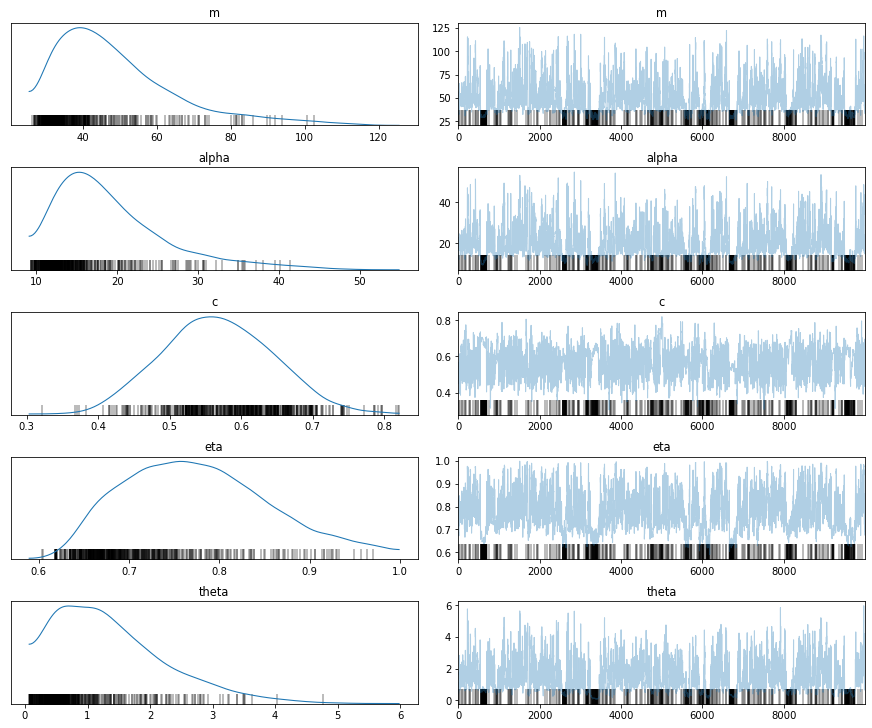

In [20]:
# Calcula posteriori
import idf
idf.idf_posterior(result=result)

In [2]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_params = pd.read_csv("params.csv", index_col='duracao')
df_params = df_params.replace({',': '.'}, regex=True)
df_params

,loc_mean,scale_mean,shape_mean,loc_25,scale_25,shape_25,loc_975,scale_975,shape_975
duracao,,,,,,,,,
1,24.95101541,9.851595467,0.067,26.47642249,8.943680988,-0.076,22.21692027,8.946428916,0.208
2,19.04286505,7.518836407,0.067,17.33372455,5.855296454,-0.076,18.08167513,7.281226168,0.208
6,10.40853508,4.10967952,0.067,8.67279086,2.929650891,-0.076,10.48474588,4.222053848,0.208
12,6.560361554,2.590276471,0.067,5.568969424,1.881186402,-0.076,6.516874245,2.624249962,0.208
24,3.989789047,1.57531816,0.067,3.568657763,1.205485243,-0.076,3.765829079,1.516444303,0.208
48,2.378168862,0.938990145,0.067,2.284487752,0.7716952578,-0.076,2.078628897,0.8370334613,0.208
72,1.747706933,0.6900601604,0.067,1.759379626,0.5943148141,-0.076,1.449325132,0.5836220374,0.208


In [7]:
df_idf = pd.DataFrame()
for i in df_params.index:
    gev_mean = stats.genextreme(loc=float(df_params['loc_mean'][i]), c=-1*float(df_params['shape_mean'][i]), scale=float(df_params['scale_mean'][i]))
    gev_25 = stats.genextreme(loc=float(df_params['loc_25'][i]), c=-1*float(df_params['shape_25'][i]), scale=float(df_params['scale_25'][i]))
    gev_975 = stats.genextreme(loc=float(df_params['loc_975'][i]), c=-1*float(df_params['shape_975'][i]), scale=float(df_params['scale_975'][i]))
    
    for t in [2, 5, 10, 20, 25]:
        df_idf.at[i, t] = gev_mean.ppf(1-(1/t))
        df_idf.at[i, '{}_25'.format(t)] = gev_25.ppf(1-(1/t))
        df_idf.at[i, '{}_975'.format(t)] = gev_975.ppf(1-(1/t))

In [90]:
df_idf

,2,2_25,2_975,5,5_25,5_975,10,10_25,10_975,20,20_25,20_975,25,25_25,25_975
1,28.606451,29.709164,25.624126,40.495833,39.155029,37.965114,48.879300,44.975951,47.891425,57.326847,50.256063,58.985196,60.092762,51.871531,62.865729
2,21.832730,19.450153,20.854696,30.906825,25.634222,30.898651,37.305172,29.445094,38.977373,43.752424,32.901906,48.006256,45.863399,33.959529,51.164503
6,11.933432,9.731729,12.092695,16.893192,12.825878,17.916731,20.390429,14.732618,22.601216,23.914397,16.462206,27.836657,25.068223,16.991379,29.667982
12,7.521484,6.248934,7.516308,10.647555,8.235749,11.136281,12.851817,9.460103,14.047960,15.072927,10.570706,17.302088,15.800169,10.910499,18.440362
24,4.574311,4.004387,4.343360,6.475481,5.277560,6.435191,7.816038,6.062140,8.117728,9.166842,6.773826,9.998153,9.609126,6.991569,10.655914
48,2.726581,2.563421,2.397409,3.859800,3.378447,3.552040,4.658858,3.880698,4.480752,5.464023,4.336287,5.518692,5.727652,4.475676,5.881757
72,2.003754,1.974198,1.671595,2.836552,2.601883,2.476662,3.423776,2.988688,3.124206,4.015489,3.339556,3.847911,4.209229,3.446905,4.101058


In [207]:
df_2 = pd.DataFrame(df_idf.loc[6]).T
#df_2 = df_2.combine_first(pd.DataFrame(df_idf.loc[12]).T)
#df_2 = df_2.combine_first(pd.DataFrame(df_idf.loc[12]).T)
df_2

,2,2_25,2_975,5,5_25,5_975,10,10_25,10_975,20,20_25,20_975,25,25_25,25_975
6,11.933432,9.731729,12.092695,16.893192,12.825878,17.916731,20.390429,14.732618,22.601216,23.914397,16.462206,27.836657,25.068223,16.991379,29.667982


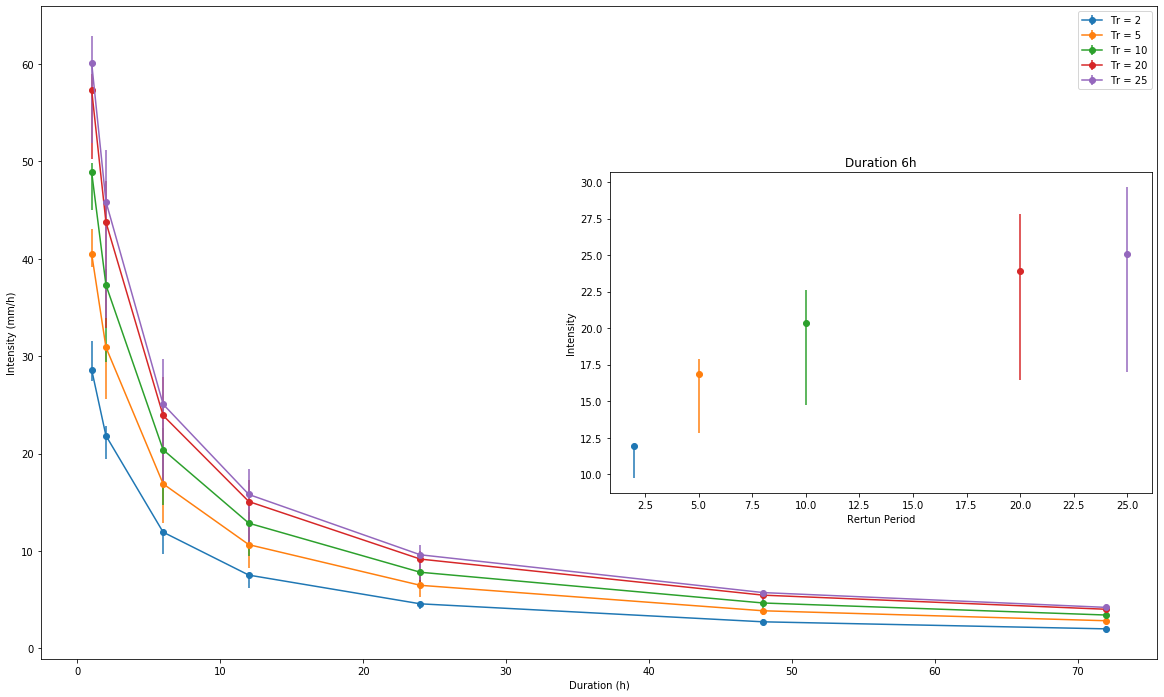

In [243]:
#Gráfico idf

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

fig, ax1 = plt.subplots(ncols=1, sharex=True, figsize = (20, 12))

x = df_idf.index
color = {'b', 'r', 'y', 'black', 'g'}
for i in [2, 5, 10, 20, 25]:
    y = df_idf[i].values
    lower_error = abs(df_idf['{}_25'.format(i)].values-y)
    upper_error = abs(y-df_idf['{}_975'.format(i)].values)
    asymmetric_error = [lower_error, upper_error]

    #ax1.plot(x,y,color)
    ax1.errorbar(x, y, yerr=asymmetric_error, fmt='o-', label='Tr = {}'.format(i))

plt.legend()
plt.ylabel('Intensity (mm/h)')
plt.xlabel('Duration (h)')

axins = zoomed_inset_axes(ax1, 1.5, loc=7) # zoom = 6
axins.yaxis.get_major_locator().set_params(nbins=10)
axins.xaxis.get_major_locator().set_params(nbins=12)
axins.set_title("Duration 6h")
axins.set_xlabel('Rertun Period')
axins.set_ylabel('Intensity')

# sub region of the original image
plt.xticks(visible=True)
plt.yticks(visible=True)


for i in [2, 5, 10, 20, 25]:
    x = i
    y = df_2[i].values
    lower_error = abs(df_2['{}_25'.format(i)].values-y)
    upper_error = abs(y-df_2['{}_975'.format(i)].values)
    asymmetric_error = [lower_error, upper_error]

    #ax1.plot(x,y,color)
    axins.errorbar(x, y, yerr=asymmetric_error, fmt='o', label='Tr = {}'.format(i))


fig.savefig('idf.svg', bbox_inches='tight')
plt.show()

The following Table shows parameters mean and respective credible intervals. Estimation was obtained by computing 10500 iterations and discarding the first 500. $\kappa$ assumes mean values around zero, indicating a similarity to Gumbel distribution. Uncertainty range estimates of the 95\% CI were calculated by taking the 0.025 and 0.0975 empirical quantiles from estimated $\psi$-draws. For $\kappa$, lower and upper bound CIs have different signs, meaning that each distribution assumes Frech\'et or Weibull. This could affect inferences for higher return periods, since the shape parameter have great influence in the distribution tail behavior. In practice, this would lead to higher discrepancies in magnitude inference from lower and upper bound of the credible interval.


Parameter | Mean   | Lower Credible Limit | Higher Credible Limit
----------|--------|----------------------|----------------------
$\mu$     | 49.433 | 27.774               | 82.521                
$\alpha$  | 19.518 | 9.382                | 33.23                 
$\kappa$  | 0.067  | -0.076               | 0.208                 
$\eta$    | 0.778  | 0.645                | 0.936                 
$\alpha$  | 1.408  | 0.077                | 3.063                 

Uncertainty in quantile estimates is dependent on the parameter uncertainty. They are related both to lack of data (short time series) and model setup (GEV distribution and priors do not completely describe observed data). IDF estimatives for return periods of 2, 5, 10, 20 and 25 years are presented in Figure 2. Credible intervals are also shown as error bars for each combination of rain duration $d$ and return period $T$. As expected, higher uncertainties are presented for lower durations, since they have higher intensity magnitudes. We limited our analysis to a return period of 25 years due to parsimony, since our data set have 14 years of annual maximas. Using the estimated equation for higher return periods would lead to even higher uncertainties as we can already see in T=25.

The degree of uncertainty in sub daily estimations is an indication that the time series is too short to identify a single parameter set with accuracy. In this way, it is important to translate parameter uncertainty into uncertainty on estimated quantiles and the resulting IDF curves when communicating results to decision makers. Detail presented in Figure 2 shows inferences for duration of 6h and different return periods. The lower bound for the return period of 25 year CI overlap estimates of 5, 10 and 20 years and present intensity almost 2x higher from lower to upper CI bounds. In other words, data is insufficient to tell the difference between 5 and 25 year events.

One major consideration in our study is the assumption of independence amongst annual maximum intensities over different durations. One single precipitation event can be the source of multiple maximum estimates for different durations, violating the assumption of independence. In fact, other studies tried different approaches to overcome this issue, such as dividing the model into
two sub-models for the short and long rainfall durations, modeling the degree of dependence using logistic distribution, or using fewer durations such as 1h, 24h and 72h (VAN DE VYVER, 2015; HUARD, D; MAILHOT, A.; DUCHENE, S., 2010; CHADRA, R.; UJJWAL, S.; MUJUMDAR, P.,2008). The latter approach has the disadvantage of using less data and consequently result in higher uncertainties in estimation.

Chandra, Rupa and Saha, Ujjwal and Mujumdar, P. P.

##### Conclusions

Uncertainty in design rainfall can have multiple sources, such as poor quality data, limitation in, record length, model type, and parameter estimation procedures. In this paper we used a Bayesian approach. A method is presented in this paper quantiles of durations between 1 and 72 h and return period between 2 and 25 years have been estimated. The data used were not able to produce stable parameters due to small record period, producing high uncertainty in quantile estimations for low duration events. Independence between events of different durations sub data sets must be studied carefully to avoid redundant data. 